# K-Means Clustering 

In [2]:
print("Name : Sudipta Bhowmik \nDomain : Artificial Intelligence & Machine Learning \nBatch : AI/ML-5(A) ")

Name : Sudipta Bhowmik 
Domain : Artificial Intelligence & Machine Learning 
Batch : AI/ML-5(A) 


# Step 1:Import required libraries 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Step 2:Load Dataset

In [4]:
data = pd.read_csv("global air pollution dataset.csv")
data.head()


,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


# Step 3:Explore dataset 

In [6]:
print("Shape of dataset:", data.shape)
print("\nDataset Info:")
print(data.info())

Shape of dataset: (23463, 12)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB
None


# Step 4:Check for missing values in dataset

In [7]:
print("\nMissing values:\n", data.isnull().sum())


Missing values:
 Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64


# Step 5:Print Statistical Summary of dataset 

In [8]:
data.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


# Step 6:Explore categorical coloumns of dataset 

In [9]:
print("Unique Countries:", data['Country'].unique())
print("Unique Cities:", data['City'].unique())
print("Unique AQI Categories:", data['AQI Category'].unique())

Unique Countries: ['Russian Federation' 'Brazil' 'Italy' 'Poland' 'France'
 'United States of America' 'Germany' 'Belgium' 'Egypt' 'China'
 'Netherlands' 'India' 'Pakistan' 'Republic of North Macedonia' 'Colombia'
 'Romania' 'Indonesia' 'Finland' 'South Africa'
 'United Kingdom of Great Britain and Northern Ireland'
 'United Republic of Tanzania' 'Haiti' 'Somalia' 'Philippines' 'Latvia'
 'Chad' 'New Zealand' 'Tunisia' 'Viet Nam' 'Iran (Islamic Republic of)'
 'Mexico' 'Japan' 'El Salvador' 'Bulgaria' 'Nigeria' 'South Sudan'
 'Guatemala' 'Ireland' 'Turkey' 'Peru' 'Democratic Republic of the Congo'
 'Canada' 'Switzerland' 'Denmark' 'Cameroon' 'Australia' 'Portugal'
 "Côte d'Ivoire" 'Sweden' 'Ethiopia' 'Thailand' 'Hungary' 'Kazakhstan'
 'Israel' 'Spain' 'Myanmar' 'Papua New Guinea' 'Madagascar' 'Lithuania'
 'Ghana' 'Azerbaijan' 'Armenia' 'Ukraine' 'Malaysia' 'Serbia' 'Slovakia'
 'Gambia' 'Ecuador' 'Bosnia and Herzegovina' 'Czechia' 'Argentina'
 'Dominican Republic' 'Guinea' 'Bolivia (Pluri

# Step 7:Select neumeric features for clustering 

In [11]:
features = data[['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']]

# Step 8:Standarize features 

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 9:Visualize AQI Distribution 

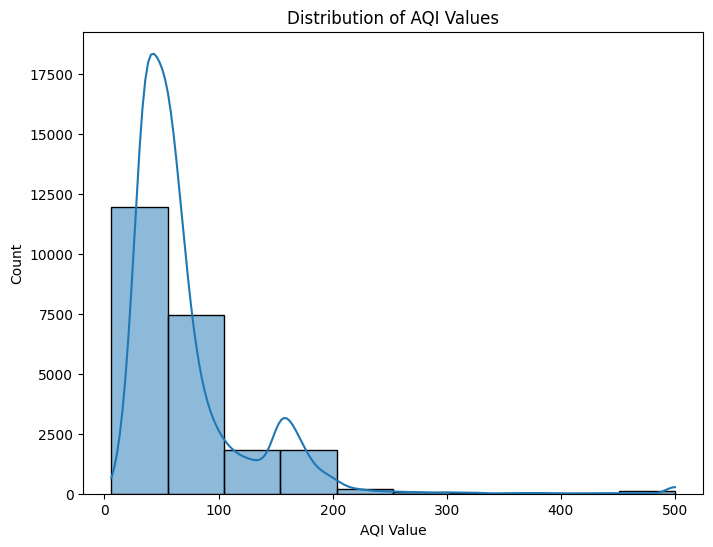

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.histplot(data['AQI Value'], bins=10, kde=True)
plt.title("Distribution of AQI Values")
plt.show()

# Step 10:Elbow method (find optimal k) 

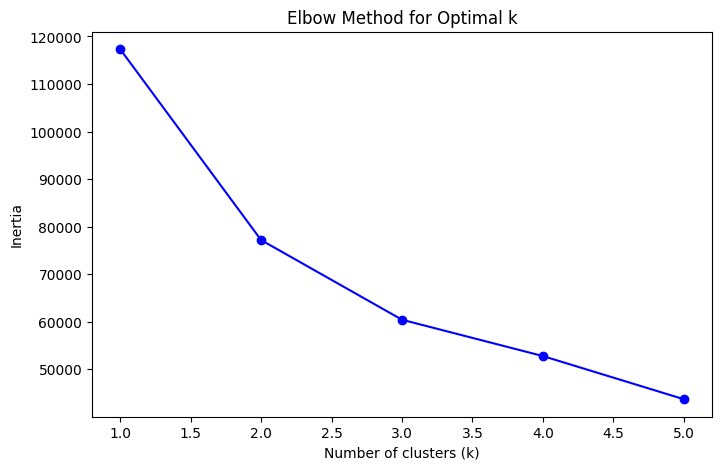

In [17]:
inertia = []
K = range(1, 6) #Since in my dataset 5 cities that's why range is 5

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Step 11:Apply K-Means Clustering

In [18]:
# KMeans with chosen k (example: k=2)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Adding cluster labels to dataset
data['Cluster'] = clusters
data

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,Cluster
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,0
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,0
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,0
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,0
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy,1
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good,0
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good,0
23461,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate,0


# Step 12:Visualize Before clustering

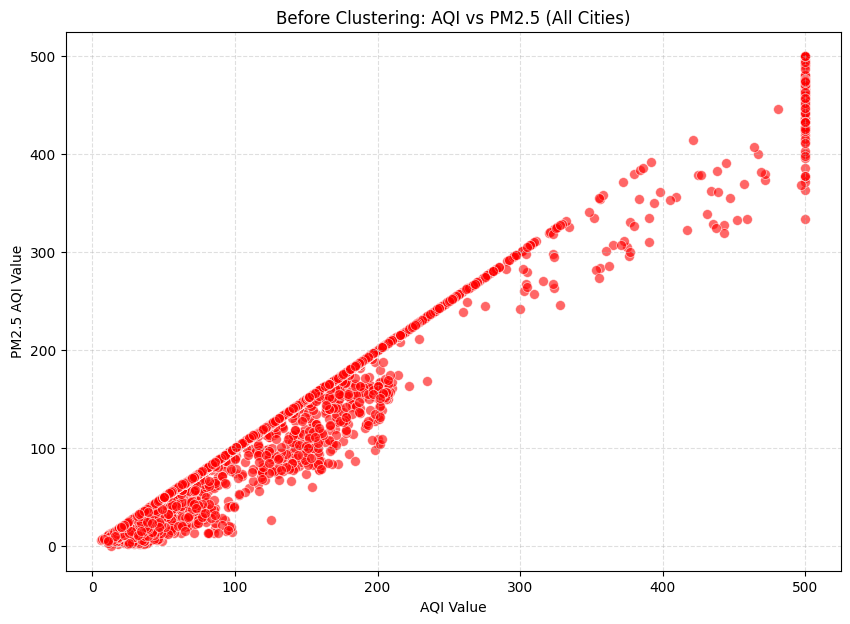

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))

sns.scatterplot(
    x=data['AQI Value'],
    y=data['PM2.5 AQI Value'],
    color='red',
    s=50,
    alpha=0.6
)

plt.title("Before Clustering: AQI vs PM2.5 (All Cities)")
plt.xlabel("AQI Value")
plt.ylabel("PM2.5 AQI Value")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


# Step 13:After Cluster Analysis 

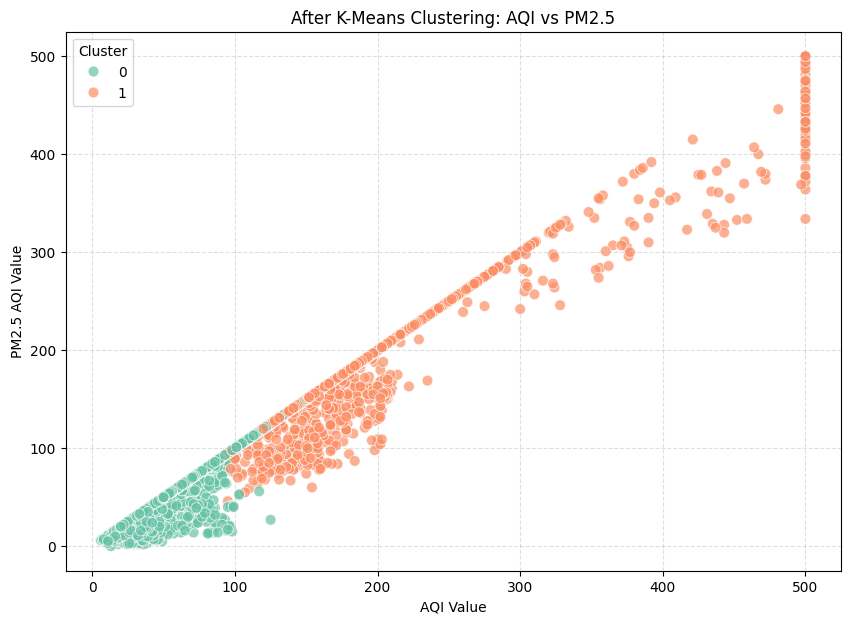

In [29]:
plt.figure(figsize=(10,7))

sns.scatterplot(
    x=data['AQI Value'],
    y=data['PM2.5 AQI Value'],
    hue=data['Cluster'],
    palette='Set2',
    s=60,
    alpha=0.7
)

plt.title("After K-Means Clustering: AQI vs PM2.5")
plt.xlabel("AQI Value")
plt.ylabel("PM2.5 AQI Value")
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(title="Cluster")
plt.show()


# Step 14(Optional):Highlight top most polluted cities 

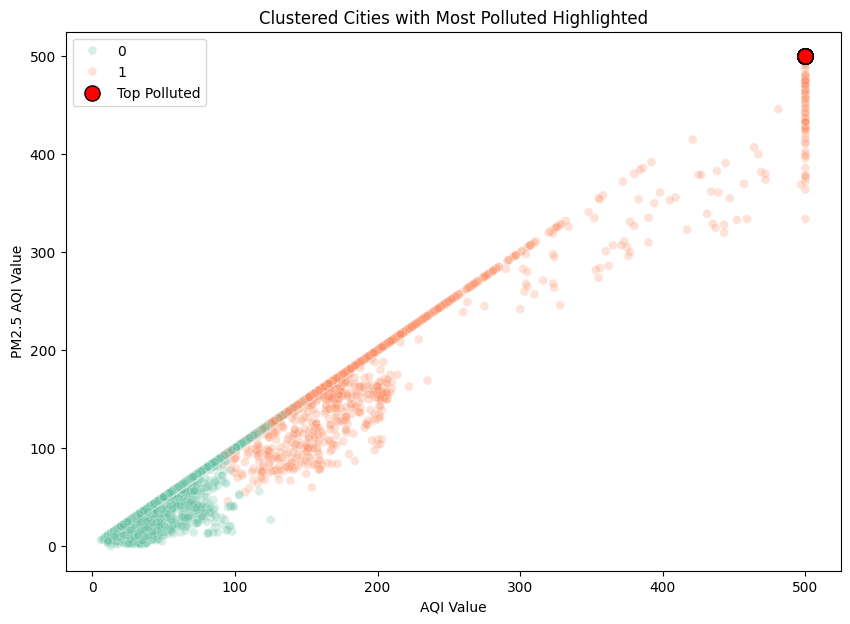

In [30]:
top = data.sort_values("PM2.5 AQI Value", ascending=False).head(15)

plt.figure(figsize=(10,7))

sns.scatterplot(
    x=data['AQI Value'],
    y=data['PM2.5 AQI Value'],
    hue=data['Cluster'],
    palette='Set2',
    s=40,
    alpha=0.25
)

plt.scatter(
    top['AQI Value'],
    top['PM2.5 AQI Value'],
    color='red',
    s=120,
    edgecolor='black',
    label='Top Polluted'
)

plt.title("Clustered Cities with Most Polluted Highlighted")
plt.xlabel("AQI Value")
plt.ylabel("PM2.5 AQI Value")
plt.legend()
plt.show()


# Step 15:Cluster Summary

In [35]:
import pandas as pd

cluster_summary = data.groupby("Cluster").agg(
    Avg_AQI=("AQI Value", "mean"),
    Avg_PM25=("PM2.5 AQI Value", "mean"),
    Min_AQI=("AQI Value", "min"),
    Max_AQI=("AQI Value", "max"),
    Cities=("City", "count")
).round(2)

display(cluster_summary)


,Avg_AQI,Avg_PM25,Min_AQI,Max_AQI,Cities
Cluster,,,,,
0,53.42,50.51,6,152,19942
1,177.31,170.55,81,500,3520
